### Synthetic Minority Oversampling Technique
The process of creating new data points within a minority class of an imbalanced dataset by using interpolation techniques between existing minority class samples, essentially "filling in the gaps" to create a more balanced distribution

In [1]:
from sklearn.datasets import  make_classification

In [2]:
X,y=make_classification(n_samples=1000  , n_features=2 , n_clusters_per_class=1, n_redundant=0 , 
                    weights=[0.90] , random_state=12)

In [3]:
import pandas as pd
df_X=pd.DataFrame(X , columns=['f1' , 'f2'])
df_y= pd.DataFrame(y , columns=['target'])

In [4]:
final_df=pd.concat([df_X,df_y] , axis=1)


In [5]:
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [6]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

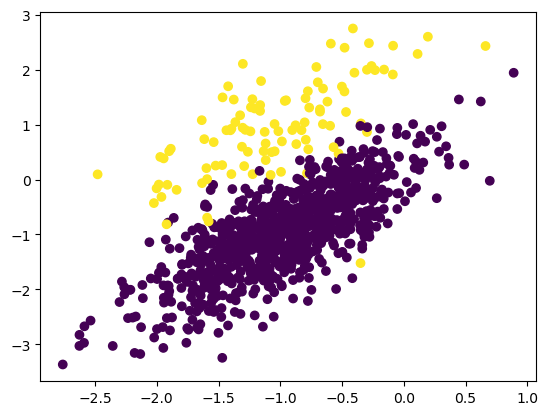

In [7]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'] , c=final_df['target'])

In [43]:
!pip install imblearn

In [8]:
from  imblearn.over_sampling import SMOTE

In [9]:
#transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1' , 'f2']] , final_df['target'])

In [10]:
X.shape

(1800, 2)

In [11]:
y.shape

(1800,)

In [12]:
len(y[y==0])

900

In [13]:
len(y[y==1])

900

In [16]:
df1=pd.DataFrame(X, columns=['f1' , 'f2'])
df2=pd.DataFrame(y , columns=['target'])
oversample_df=pd.concat([df1, df2],axis=1)

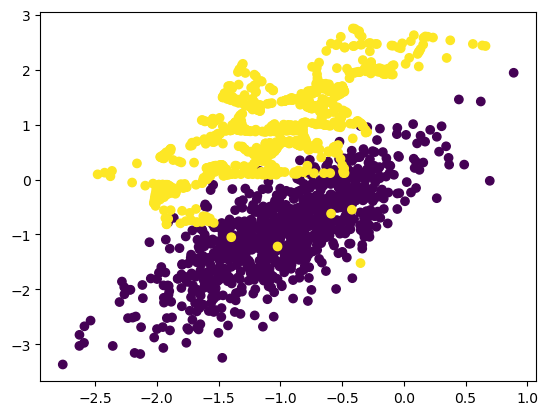

In [17]:
plt.scatter(oversample_df['f1'] , oversample_df['f2'] , c=oversample_df['target'])